In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import sys
nx=801
ny=801
nz=187
nt=2501
dx=25
dt=0.00033
def readfile(filename,n1=nx,n2=ny,n3=nz):
    f=open(filename)
    data=np.fromfile(f,dtype='float32')
    data=data.reshape((n1,n2,n3))
    return data

def imagesc(data,scale):
    nx,nz=np.shape(data)
    plt.imshow(data.T,vmin=scale*np.min(data),vmax=scale*np.max(data),extent=(0,nx*dx,0,nz*dx),aspect='auto', origin='lower',cmap='seismic')
    plt.colorbar()
    plt.gca().invert_yaxis() 
    plt.xlabel('distance(m)',fontsize=10)
    plt.ylabel('depth(m)',fontsize=10)
    plt.show()    
def plotseis(data,scale):
    nx,nz=np.shape(data)
    plt.imshow(data.T,vmin=scale*np.min(data),vmax=scale*np.max(data),extent=(0,nx*dx,0,nz*dt),aspect='auto', origin='lower',cmap='seismic')
    plt.colorbar()
    plt.gca().invert_yaxis() 
    plt.xlabel('distance(m)',fontsize=10)
    plt.ylabel('Time(s)',fontsize=10)
    plt.show() 

plt.rcParams["figure.figsize"] = [10,4]

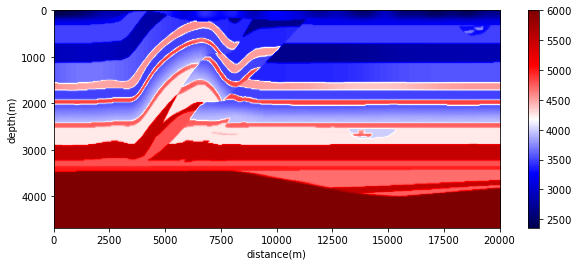

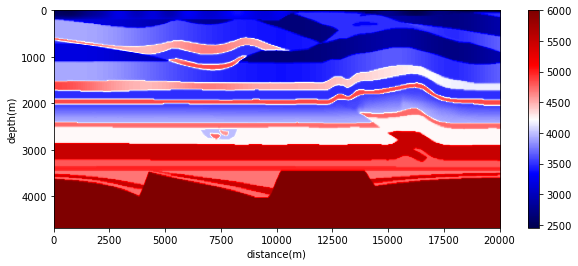

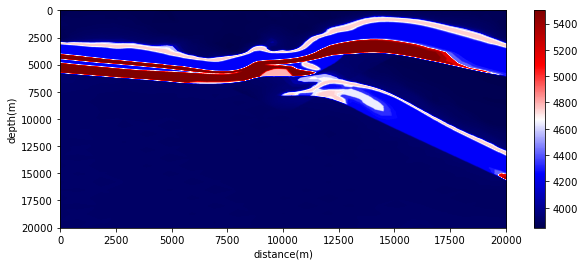

In [4]:
#展示模型
# vel=readfile('model/vp_801_801_187.dat',nx,ny,nz)
imagesc(vel[int(nx/2),:,:],scale=1)
imagesc(vel[:,int(ny/2),:],scale=1)
imagesc(vel[:,:,int(nz/2)],scale=1)

In [10]:
vv=readfile('./model/isodelta_801_801_187.dat')
# imagesc(vv[:,400,:],1)
print(np.max(vv))

0.0


In [11]:
#展示模型
eps=ndimage.gaussian_filter(vel,(15,15,15))
eps=eps/np.max(eps)*0.14
delta=ndimage.gaussian_filter(vel,(25,25,25))
delta=delta/np.max(delta)*0.06
# imagesc(eps[int(nx/2),:,:],scale=1)
# imagesc(eps[:,int(ny/2),:],scale=1)
# imagesc(eps[:,:,int(nz/2)],scale=1)
# imagesc(delta[int(nx/2),:,:],scale=1)
# imagesc(delta[:,int(ny/2),:],scale=1)
# imagesc(delta[:,:,int(nz/2)],scale=1)
eps.tofile('./model/vtieps_801_801_187.dat')
delta.tofile('./model/vtidelta_801_801_187.dat')